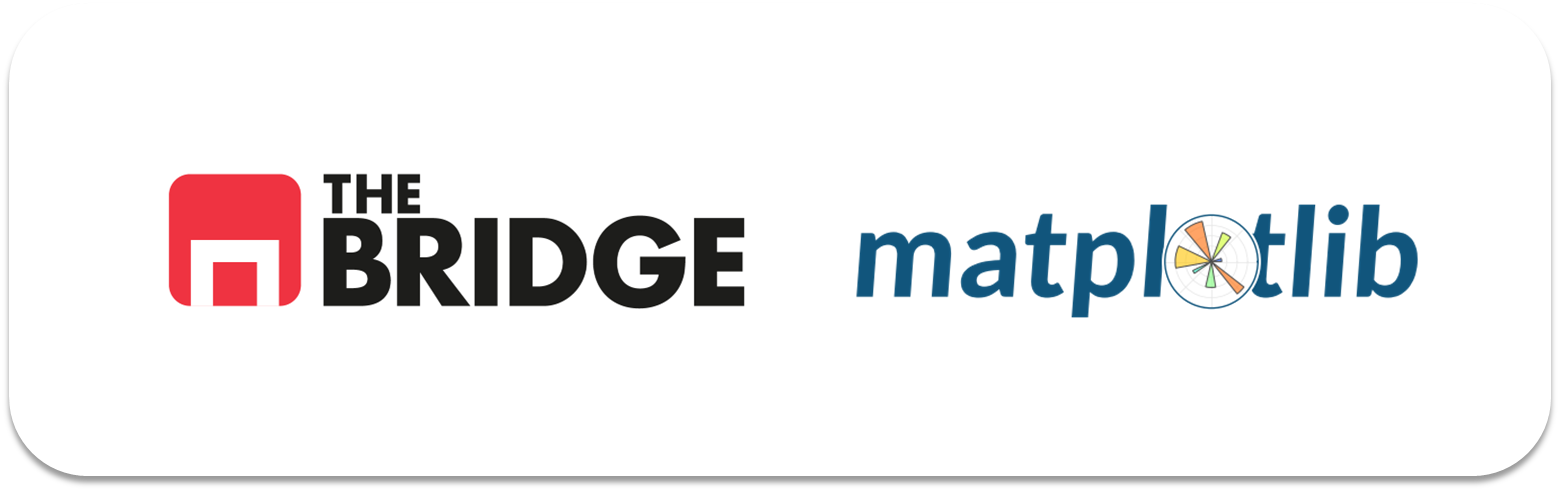

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [46]:
df_casas = pd.read_csv("./data/california_cities.csv")
df_casas.head(5)
df_casas.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

In [25]:
#Borrar columnas con nulos
columnas = df_casas.columns
for elemento in columnas:
    if df_casas[elemento].isnull().sum() != 0:
        print(elemento)
        df_casas.drop(columns= elemento, inplace=True)
# df_casas.info()

#Borrar filas con nulos
df_limpio = df_casas.dropna()
df_limpio.info()
df_limpio.head(5)

elevation_m
elevation_ft
area_total_sq_mi
area_water_sq_mi
area_total_km2
area_land_km2
area_water_km2
area_water_percent
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        482 non-null    int64  
 1   city              482 non-null    object 
 2   latd              482 non-null    float64
 3   longd             482 non-null    float64
 4   population_total  482 non-null    int64  
 5   area_land_sq_mi   482 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 22.7+ KB


,Unnamed: 0,city,latd,longd,population_total,area_land_sq_mi
0,0,Adelanto,34.576111,-117.432778,31765,56.009
1,1,AgouraHills,34.153333,-118.761667,20330,7.793
2,2,Alameda,37.756111,-122.274444,75467,10.611
3,3,Albany,37.886944,-122.297778,18969,1.788
4,4,Alhambra,34.081944,-118.135000,83089,7.631


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

In [95]:
grupo = (df_limpio.groupby(["city"])["population_total"].mean())/1000
categorias = grupo.nlargest(5).index.to_list()
frecuencias = grupo.nlargest(5).to_list()



In [98]:
#LO HE HECHO CON TODAS LAS CIUDADES, NO ME SALE CALIFORNIA
cond_california = df_limpio["city"] == "California"
df_limpio.loc[cond_california]

,Unnamed: 0,city,latd,longd,population_total,area_land_sq_mi


C:\Users\USER\AppData\Local\Temp\ipykernel_13336\3952141293.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend(title ="Area km")


Text(0.5, 1.0, 'Diagrama de caja Altitud California')

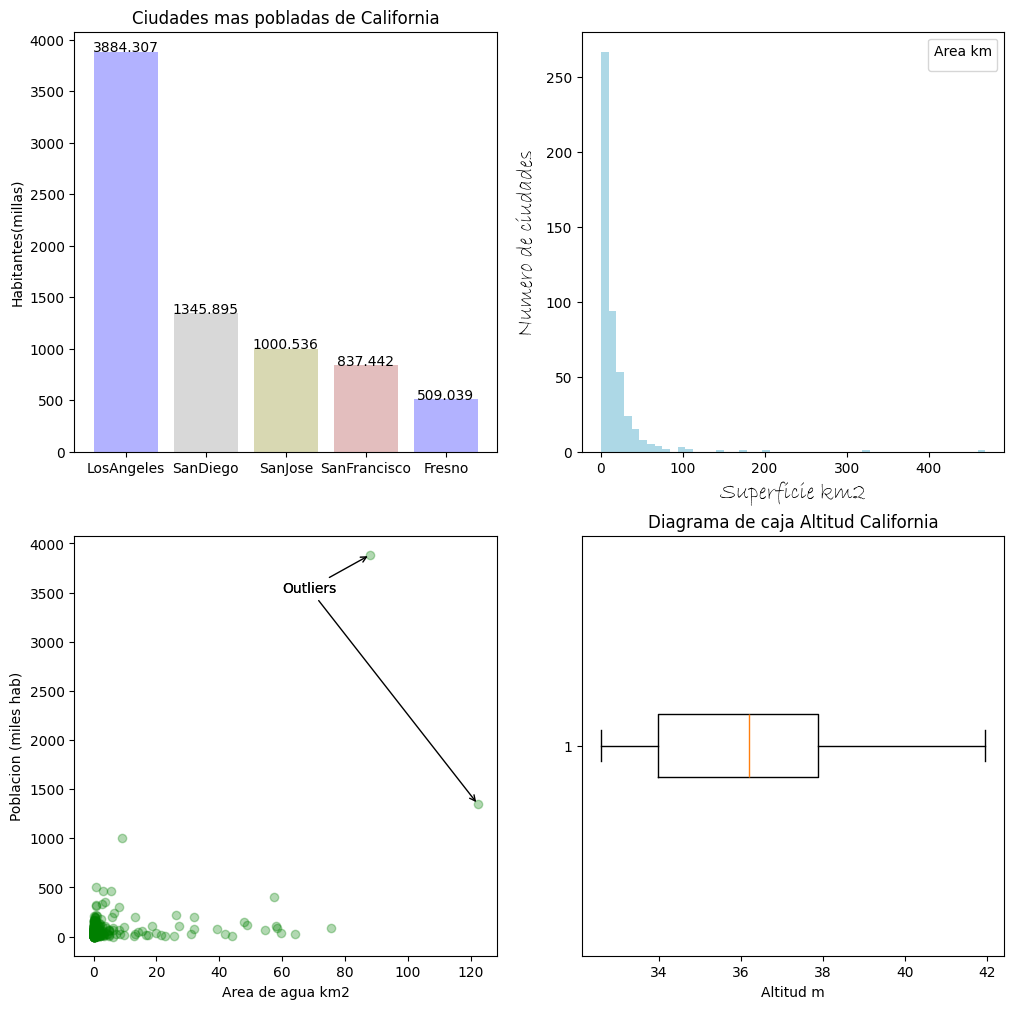

In [93]:
fig,ax = plt.subplots(2,2, figsize =(12,12))



ax[0,0].bar(categorias, frecuencias, color= ["blue","grey","olive", "brown","blue"], alpha = 0.3)
ax[0,0].set_ylabel("Habitantes(millas)")
ax[0,0].set_title("Ciudades mas pobladas de California")
for x,y in zip(categorias, frecuencias):
    ax[0,0].text(x,y,y, ha = "center")

    
ax[0,1].hist(df_limpio["area_land_sq_mi"],bins = 50, color= "lightblue")
ax[0,1].set_ylabel("Numero de ciudades", fontdict = {"family":"Bradley Hand itc", "size":16})
ax[0,1].set_xlabel("Superficie km2", fontdict = {"family":"Bradley Hand itc", "size":16})
ax[0,1].legend(title ="Area km")


ax[1,0].scatter(df_casas['area_water_km2'],df_casas["population_total"]/1000, color ="green", alpha =0.3 )
outx = df_casas["area_water_km2"].nlargest(2).to_list()
outx.sort(reverse= False)
outy = df_casas["population_total"].nlargest(2).to_list()
ax[1,0].set_ylabel("Poblacion (miles hab)")
ax[1,0].set_xlabel("Area de agua km2")
ax[1,0].annotate("Outliers", xy=(outx[0], outy[0]/1000),  xytext = (60, 3500), arrowprops ={"arrowstyle":"->"})
ax[1,0].annotate("Outliers", xy=(outx[1], outy[1]/1000),  xytext = (60, 3500), arrowprops ={"arrowstyle":"->"})




ax[1,1].boxplot(df_limpio["latd"], vert = False)
ax[1,1].set_xlabel("Altitud m")
ax[1,1].set_title("Diagrama de caja Altitud California")




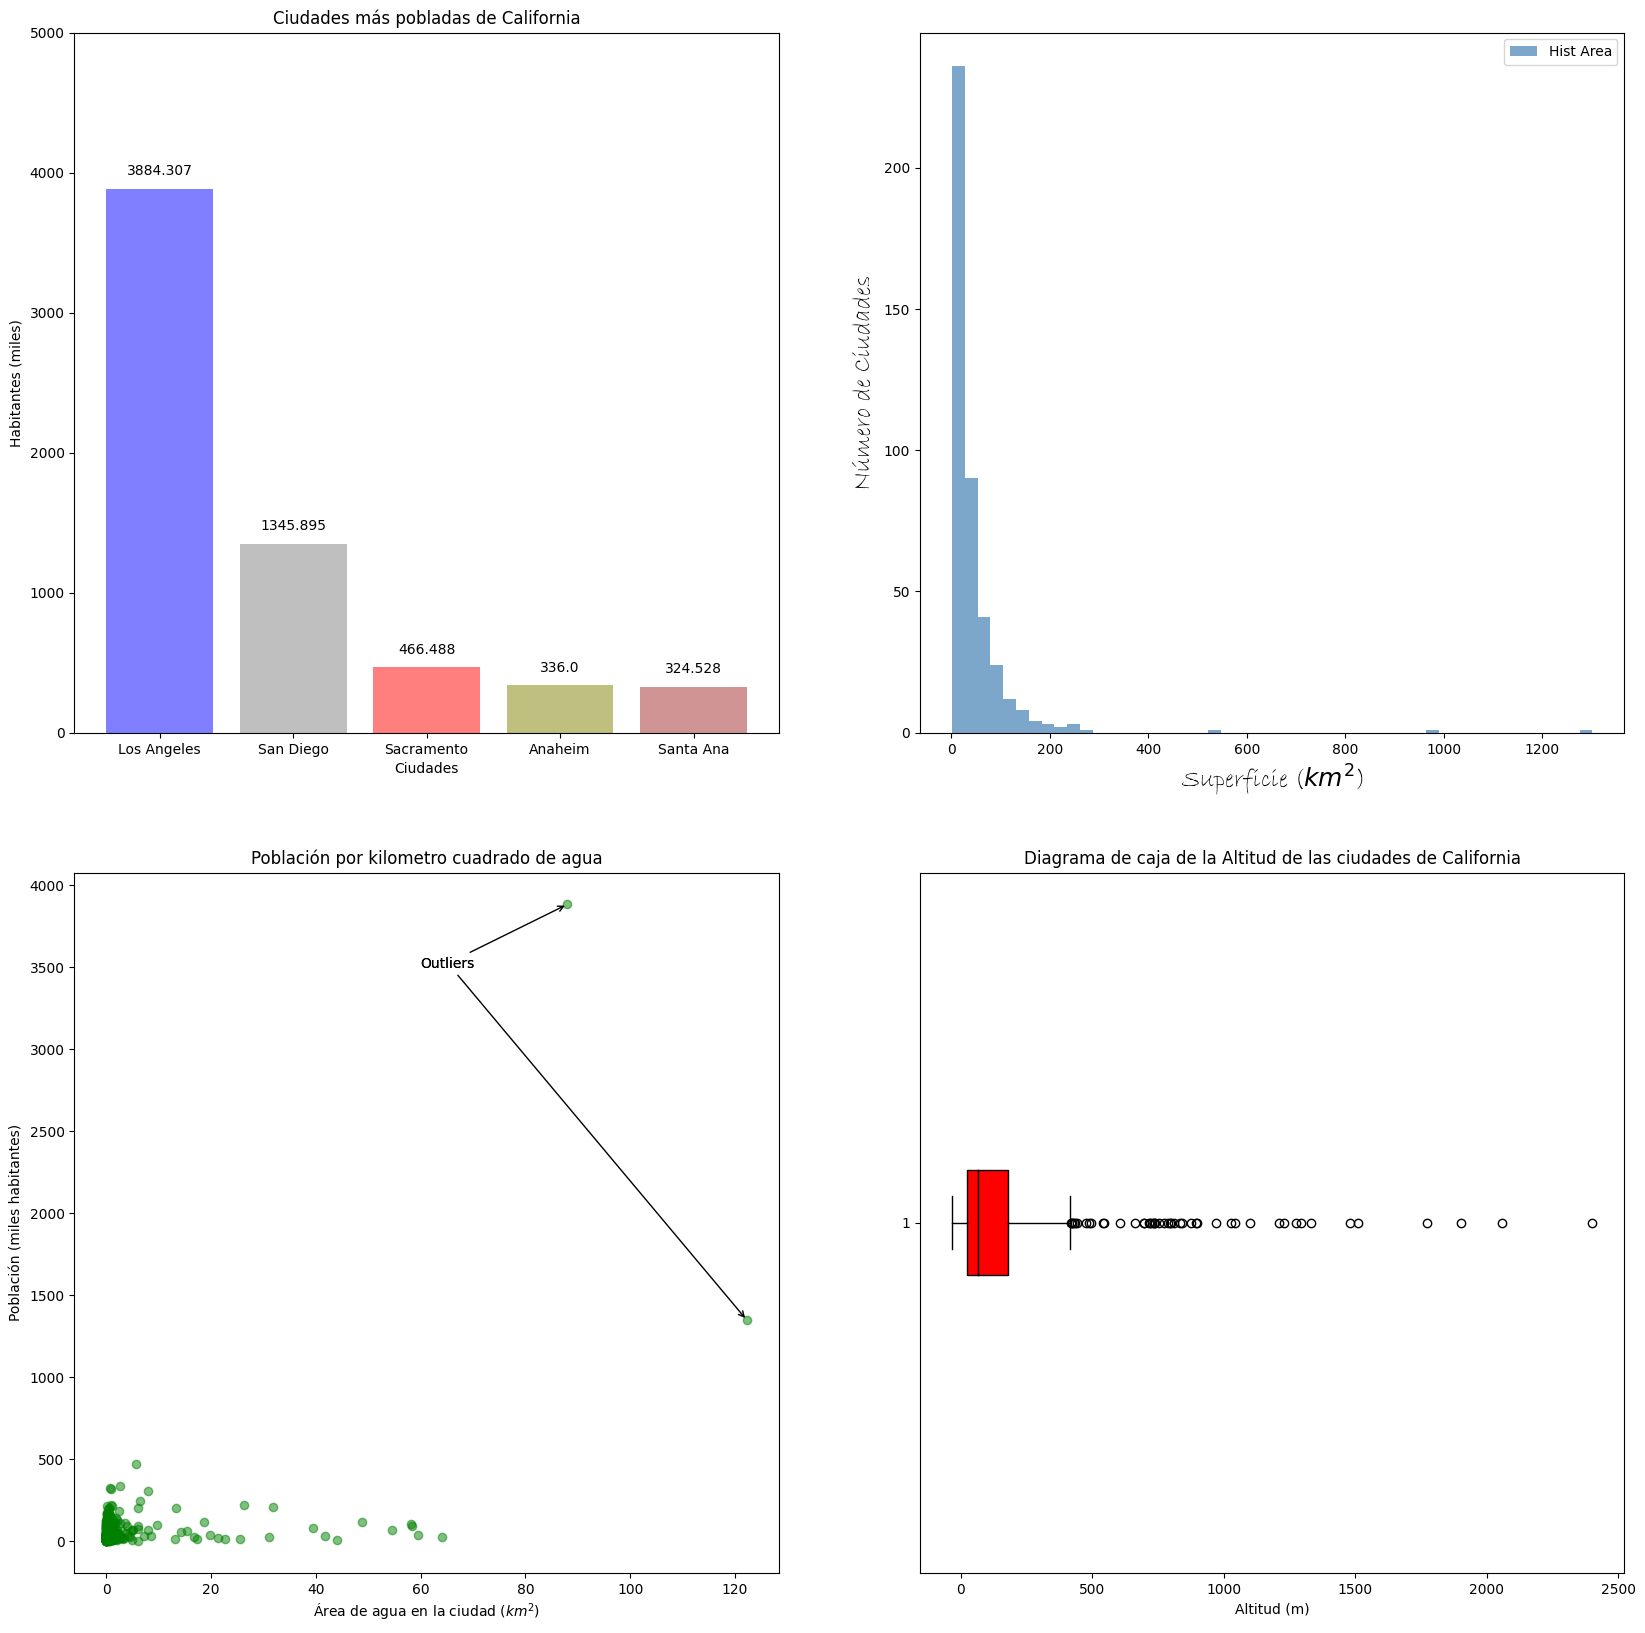

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.